# 📘 Unsupervised Learning with PCA and K-Means
In this notebook, we explore unsupervised learning using the **Iris dataset**. We'll apply:
- **PCA** (Principal Component Analysis) for dimensionality reduction
- **K-Means** clustering for grouping similar samples
- Evaluation using **Silhouette Score**
- Visualization of clustering results

In [3]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style='whitegrid')


## 🌼 Step 1: Load the Iris Dataset
We'll start by loading the Iris dataset, which includes 150 samples and 4 features per flower.

In [6]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 🔄 Step 2: Scale the Data and Apply PCA
PCA is sensitive to feature magnitudes, so we first **standardize** the dataset using `StandardScaler`,  
then reduce the dimensions from 4D to 2D for visualization.


In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])  # exclude 'target'

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']
df_pca.head()


,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


### 🎨 Visualize PCA Projection with True Labels
Even though we don’t use labels in unsupervised learning, we can visualize how well PCA separates known classes.

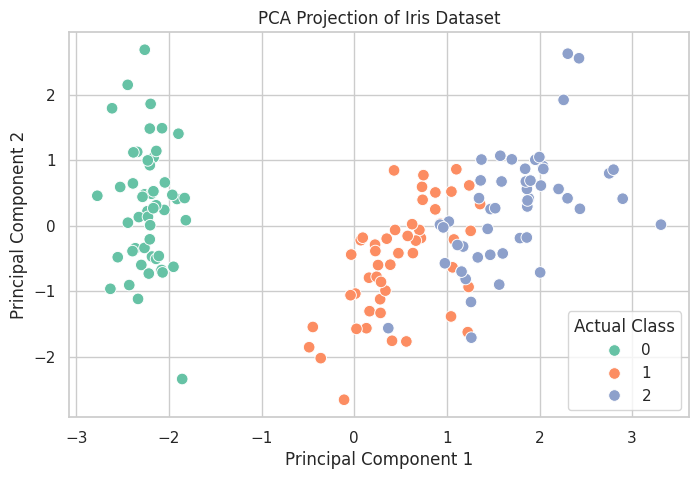

In [8]:
# Plot PCA result colored by actual class labels
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set2', s=70)
plt.title('PCA Projection of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Actual Class')
plt.grid(True)
plt.show()


## 🤖 Step 3: K-Means Clustering
Now that we’ve reduced our data to two dimensions, we apply **K-Means clustering** to discover natural groupings.
We expect 3 clusters corresponding to the 3 Iris flower classes (setosa, versicolor, virginica).

In [9]:
# Apply K-Means with k=3 (known number of Iris classes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_pca['cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])
df_pca.head()


,PC1,PC2,target,cluster
0,-2.264703,0.480027,0,1
1,-2.080961,-0.674134,0,1
2,-2.364229,-0.341908,0,1
3,-2.299384,-0.597395,0,1
4,-2.389842,0.646835,0,1


### 📊 Visualize K-Means Clusters
We now visualize the K-Means clustering results using the PCA-reduced components.

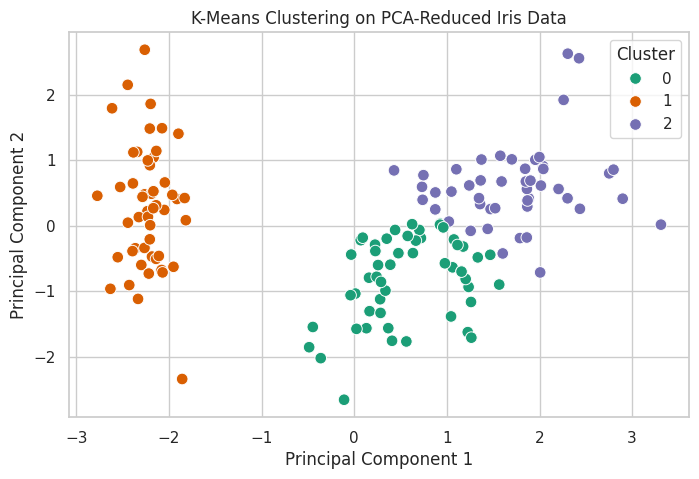

In [10]:
# Plot PCA projection with K-Means clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Dark2', s=70)
plt.title('K-Means Clustering on PCA-Reduced Iris Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## 📏 Step 4: Evaluate Clustering with Silhouette Score
To assess how well the clustering has been performed, we calculate the **Silhouette Score**.  
This score ranges from -1 (incorrect clustering) to 1 (dense, well-separated clusters).


In [11]:
# Calculate Silhouette Score
score = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.51


## 🔍 Step 5: Compare Clustering vs Actual Labels
Although K-Means is unsupervised, we can compare its clustering results to the true Iris species labels  
to visually evaluate alignment.


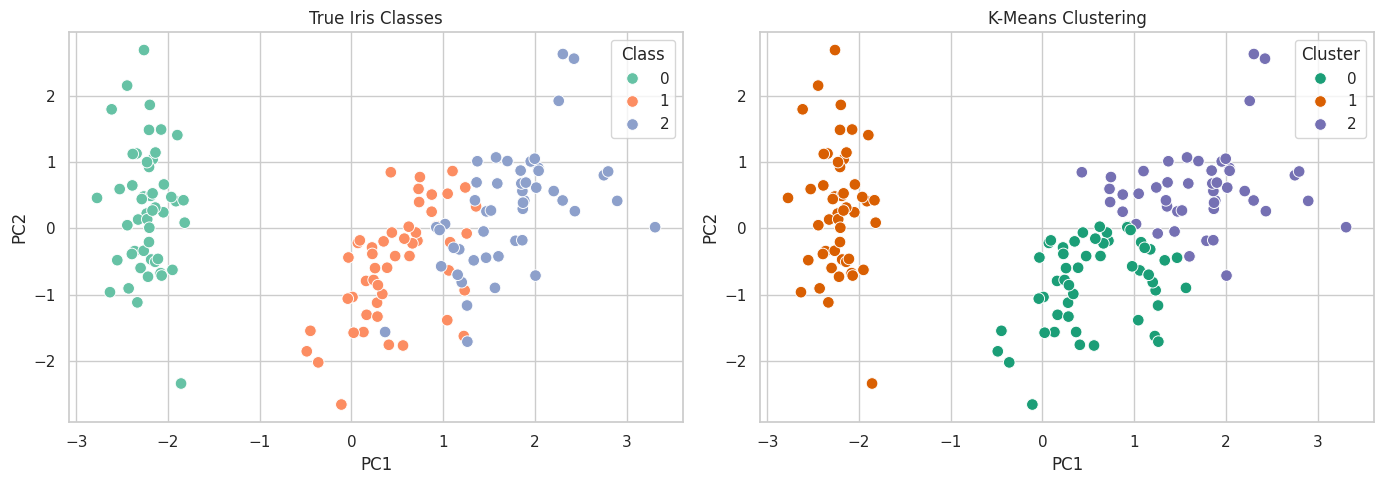

In [12]:
# Plot side-by-side: True labels vs. K-Means clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# True labels plot
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='target',
    palette='Set2',
    ax=axes[0],
    s=70
)
axes[0].set_title('True Iris Classes')
axes[0].legend(title='Class')

# K-Means cluster plot
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='cluster',
    palette='Dark2',
    ax=axes[1],
    s=70
)
axes[1].set_title('K-Means Clustering')
axes[1].legend(title='Cluster')

# Common styling
for ax in axes:
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.grid(True)

plt.tight_layout()
plt.show()


## 🌀 Step 6: Try DBSCAN Clustering
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** identifies clusters of varying shapes and handles outliers well. We’ll apply it to our PCA-reduced dataset.


In [13]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_pca['dbscan_cluster'] = dbscan.fit_predict(df_pca[['PC1', 'PC2']])
df_pca['dbscan_cluster'].value_counts().sort_index()


dbscan_cluster
-1    12
 0    48
 1    90
Name: count, dtype: int64

### 🎨 Visualize DBSCAN Clusters
Noise points are labeled as `-1` by DBSCAN.


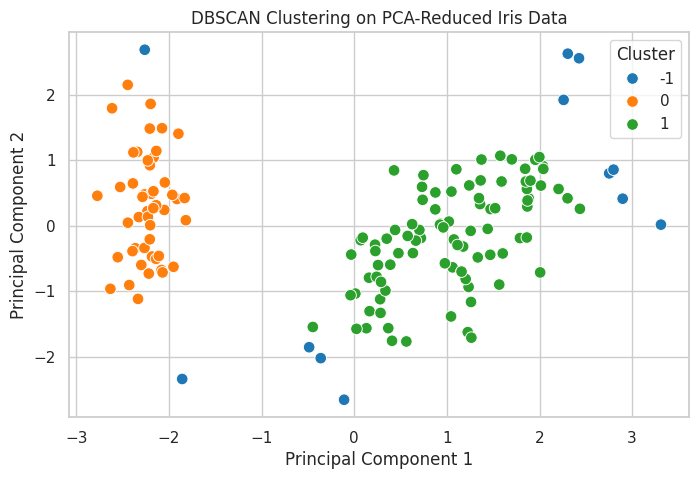

In [14]:
# Visualize DBSCAN result
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='dbscan_cluster',
    palette='tab10',
    s=70
)
plt.title('DBSCAN Clustering on PCA-Reduced Iris Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## 🧬 Step 7: Hierarchical Clustering
We now apply **Agglomerative Clustering** and visualize the dendrogram to explore the hierarchy of cluster merging.  
This technique doesn't require specifying the number of clusters beforehand (though we can set it manually too).


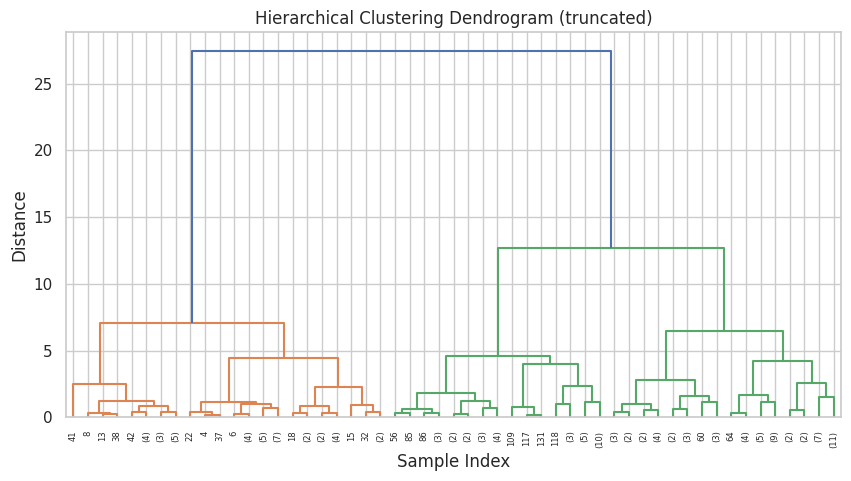

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform linkage for dendrogram
linked = linkage(df_pca[['PC1', 'PC2']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


### 🔗 Apply Agglomerative Clustering (k=3)


In [16]:
# Fit Agglomerative Clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
df_pca['agglo_cluster'] = agglo.fit_predict(df_pca[['PC1', 'PC2']])
df_pca['agglo_cluster'].value_counts().sort_index()


agglo_cluster
0    50
1    61
2    39
Name: count, dtype: int64

### 🎨 Visualize Agglomerative Clustering Results


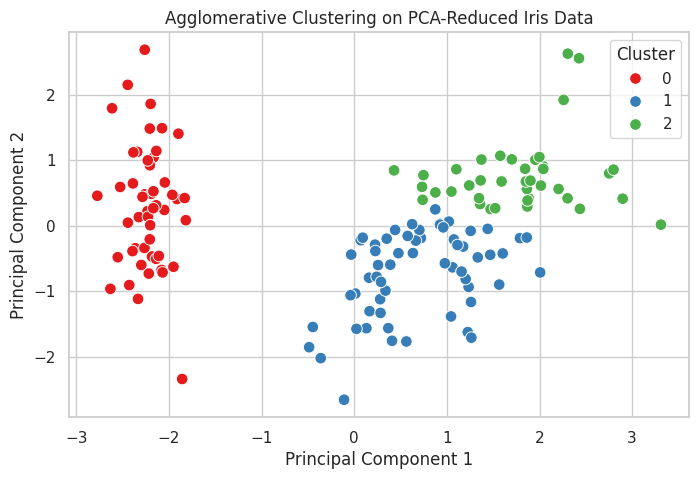

In [17]:
# Visualize Agglomerative Clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='agglo_cluster',
    palette='Set1',
    s=70
)
plt.title('Agglomerative Clustering on PCA-Reduced Iris Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
